In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [39]:


GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/js-{idx}.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data1 = datas.reset_index()

data1.shape

(900, 25)

In [31]:


GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/py-{idx}.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data2 = datas.reset_index()

data2.shape

(900, 25)

In [32]:
GITHUB_CDN = "https://raw.githubusercontent.com/realamirhe/github-stargazer"
js_repo_urls = map(
    lambda idx: f"{GITHUB_CDN}/master/data/datas.csv",
    range(1, 10)
)

datas = pd.concat(list(map(pd.read_csv, js_repo_urls)))
datas = datas.select_dtypes(exclude=['object'])
datas = datas.drop(columns=['Unnamed: 0', 'score'], axis=1)
data3 = datas.reset_index()

data3.shape

(12303, 25)

In [33]:
data=pd.concat([data1,data2,data3])
data.drop_duplicates(inplace=True)
data.shape

(1538, 25)

In [96]:
# startruck_ranges = (0, 1, 16, 128, 512, 4096, 16384, 65536, 262144)
startruck_ranges = (0,8,64,np.inf)
startruck_labels = [0, 1,2]
y = data['stargazers_count']
y = pd.cut(y, [i-1 for i in startruck_ranges], labels=startruck_labels)

X = data.drop(columns=['stargazers_count', 'index', 'watchers', 'watchers_count'])
X = X.replace({ False: 0, True: 1 })
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 0 to 1366
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   private                      1538 non-null   int64
 1   owner.public_repos           1538 non-null   int64
 2   owner.public_gists           1538 non-null   int64
 3   owner.followers              1538 non-null   int64
 4   owner.following              1538 non-null   int64
 5   fork                         1538 non-null   int64
 6   forks                        1538 non-null   int64
 7   size                         1538 non-null   int64
 8   has_issues                   1538 non-null   int64
 9   has_projects                 1538 non-null   int64
 10  has_downloads                1538 non-null   int64
 11  has_wiki                     1538 non-null   int64
 12  has_pages                    1538 non-null   int64
 13  has_discussions              1538 non-null   int

In [57]:
pca=PCA(n_components=2)
pca.fit(X)
print(np.sum(pca.explained_variance_ratio_))
xp=pca.transform(X)
x_train, x_test, y_train, y_test = train_test_split(xp, y, test_size=0.2, random_state=42)

0.9999373333671601


Text(0.5, 1.0, '5-fold cross validation for KNN')

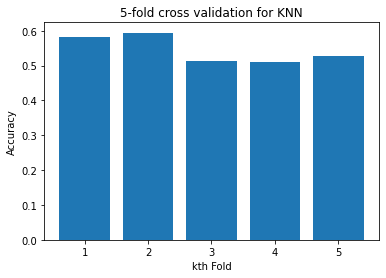

In [64]:
knn = KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
acc=cross_val_score(knn, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for KNN')

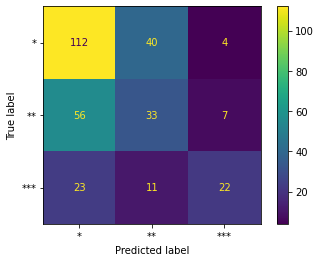

In [99]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**','***'])
cm_display.plot()
plt.show()

Text(0.5, 1.0, '5-fold cross validation for SVM')

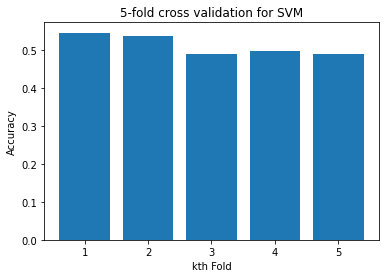

In [65]:
from sklearn.svm import SVC
clf=SVC(C=5,gamma='auto')
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for SVM')

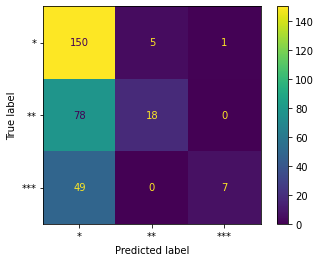

In [100]:
clf=SVC(C=5,gamma='auto')
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**','***'])
cm_display.plot()
plt.show()

Text(0.5, 1.0, '5-fold cross validation for logestic regression')

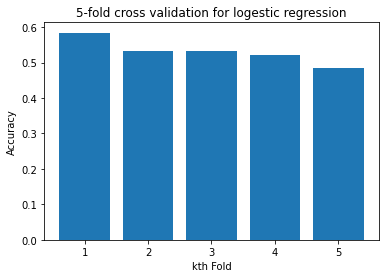

In [107]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for logestic regression')

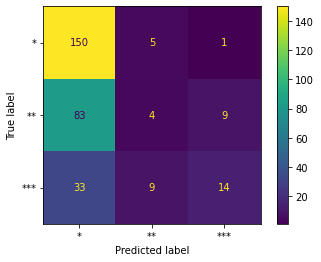

In [101]:
clf = LogisticRegression(random_state=0,max_iter=1000)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**','***'])
cm_display.plot()
plt.show()

Text(0.5, 1.0, '5-fold cross validation for Decision Tree')

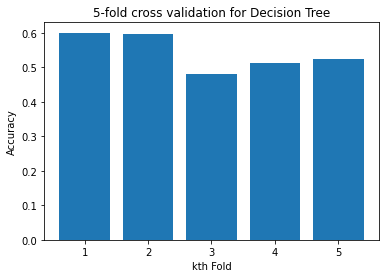

In [138]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=2)
acc=cross_val_score(clf, xp, y, cv=5)
plt.bar(np.arange(5)+1,acc)
plt.xlabel('kth Fold')
plt.ylabel('Accuracy')
plt.title('5-fold cross validation for Decision Tree')

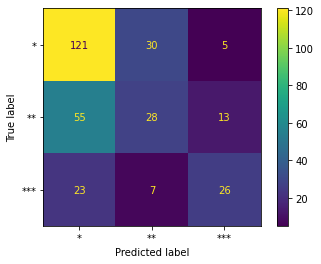

In [135]:
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)
y_p=clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_p)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = ['*', '**','***'])
cm_display.plot()
plt.show()

In [139]:
# !pip install sklearn_hierarchical_classification
# from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
# from sklearn_hierarchical_classification.constants import ROOT
# class_hierarchy = {
#         ROOT: ["A", "B"],
#         "A": ["0", "1"],
#         "B": ["2"]}
# clf = HierarchicalClassifier(
#     base_estimator=SVC(C=5,gamma='auto',probability=True),
#     class_hierarchy=class_hierarchy)

# acc=cross_val_score(clf, xp, y.astype(str), cv=5)
# plt.bar(np.arange(5)+1,acc)
# plt.xlabel('kth Fold')
# plt.ylabel('Accuracy')
# plt.title('5-fold cross validation for hierachy')